In [1]:
%pylab inline
import ROOT
import root_numpy
import pandas as pd
import glob

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pyAmsUtils import tree_to_frame

In [3]:
#tfiles = [ROOT.TFile("/data/deuteronMC.ntuple{0}.root".format(i)) for i in range(1,4)]
filenames =glob.glob("/data/13*.root")[:3]

In [5]:
def get_frame(f):
    tfile = ROOT.TFile(f)
    tree  = tfile.Get("selections")
    return tree_to_frame(tree, "PhysBPatt") 
    
data = pd.concat([get_frame(f) for f in filenames])

In [6]:
pattcounts = data.map(lambda x:np.binary_repr(x,8)).value_counts()

# Counts (linear scale)

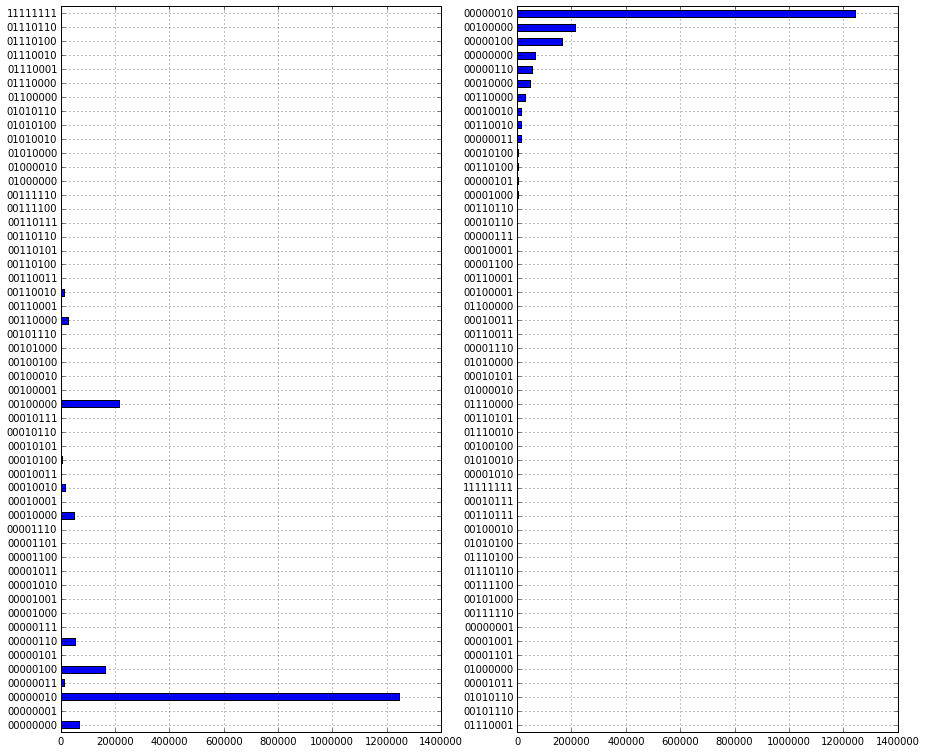

In [7]:
figsize(15,13)
subplot(121);pattcounts.sort_index().plot(kind='barh')
subplot(122);pattcounts.sort(ascending=True); pattcounts.plot(kind='barh')

#Counts (Log scale)

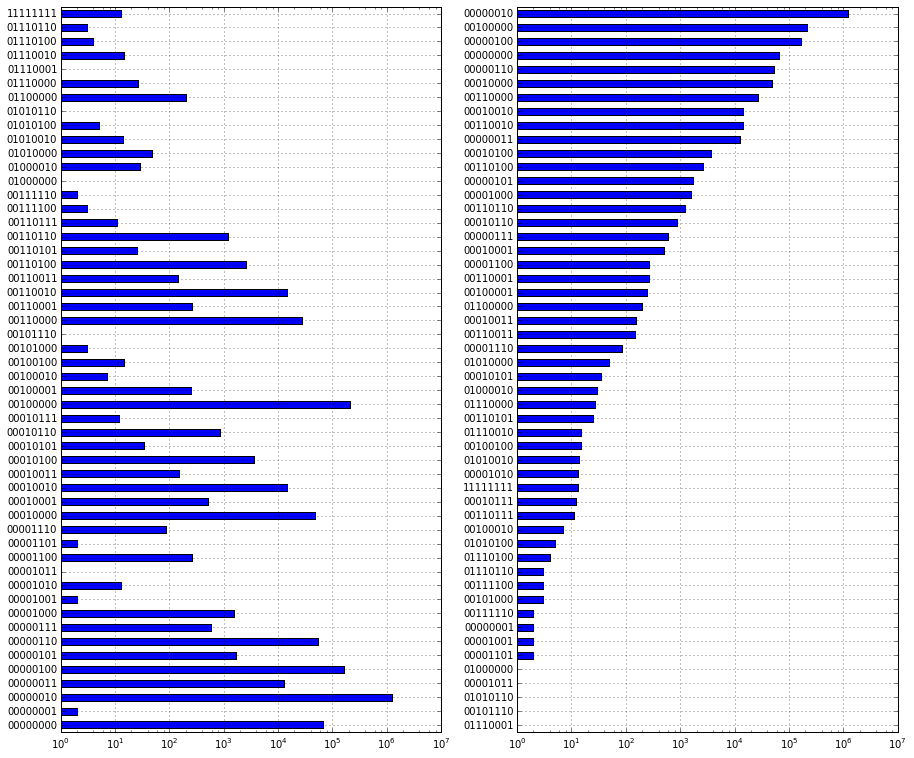

In [8]:
figsize(15,13)
subplot(121);pattcounts.sort_index().plot(kind='barh', logx=True)
subplot(122);pattcounts.sort(ascending=True); pattcounts.plot(kind='barh', logx=True)